In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset into dataframe
ca_fire_data = pd.read_csv(
    'Resources/CA_Fires.csv',
    parse_dates=['DISCOVERY_DATE', 'CONT_DATE'],
    dtype={'FIRE_YEAR': str, 'LOCAL_INCIDENT_ID': str, 'FIRE_CODE': str, 'COUNTY': str}
)

# Print column names and sample data
print(ca_fire_data.columns)
ca_fire_data.head()

Index(['FPA_ID', 'SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_UNIT_NAME',
       'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME',
       'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')


,FPA_ID,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,...,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY,FIPS_CODE,FIPS_NAME
0,FS-1418826,FED,Plumas National Forest,0511,Plumas National Forest,1.0,PNF-47,BJ8K,FOUNTAIN,NaN,...,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,63,6063.0,Plumas County
1,FS-1418827,FED,Eldorado National Forest,0503,Eldorado National Forest,13.0,13,AAC0,PIGEON,NaN,...,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,61,6061.0,Placer County
2,FS-1418835,FED,Eldorado National Forest,0503,Eldorado National Forest,27.0,021,A32W,SLACK,NaN,...,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,17,6017.0,El Dorado County
3,FS-1418845,FED,Eldorado National Forest,0503,Eldorado National Forest,43.0,6,NaN,DEER,NaN,...,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,3,6003.0,Alpine County
4,FS-1418847,FED,Eldorado National Forest,0503,Eldorado National Forest,44.0,7,NaN,STEVENOT,NaN,...,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,3,6003.0,Alpine County


In [3]:
avg_fire_size = ca_fire_data['FIRE_SIZE'].mean()
avg_fire_size

96.20275120184463

# Number of Fires Each Year

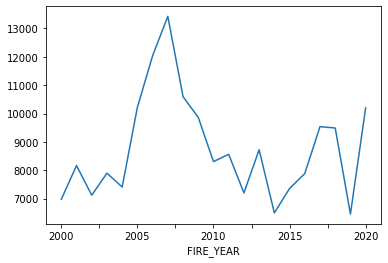

In [20]:
fires_per_year = ca_fire_data.groupby('FIRE_YEAR').count()['FPA_ID']
fires_per_year.plot(kind='line')
plt.show()

# Question 2 (Code Below)

# Top 5 Causes of Fires (Code Below)

In [7]:
causes = ca_fire_data.groupby('NWCG_GENERAL_CAUSE').count()
top_5_causes = causes.loc[causes['FPA_ID'] > 10000]['FPA_ID']
top_5_causes

NWCG_GENERAL_CAUSE
Arson/incendiarism                         17031
Debris and open burning                    15666
Equipment and vehicle use                  28815
Missing data/not specified/undetermined    78635
Natural                                    19681
Name: FPA_ID, dtype: int64

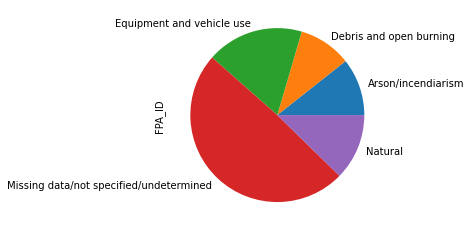

In [8]:
top_5_causes.plot(kind='pie')
plt.show()

# Question 4 (Code Below)

# Question 5 (Code Below)

# Question 6 (Code Below)

# Question 7 (Code Below)

# Question 8 (Code Below)